### 신경망(Neural Network)

중요한 성질 : 가중치 매개변수의 적절한 값 자동으로 학습하는 능력  

• 시그모이드 함수 이용하여 신호 변환 → 변환된 신호를 다음 뉴런에 전달

In [21]:
# 계단 함수 구현하기
# 입력 0 넘으면 1 출력, 그 외에는 0 출력

def step_function(x):  
    if x > 0:
        return 1
    else:
        return 0

In [22]:
# numpy 배열로 구현 

def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [23]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
x

y = x > 0
y

# y는 bool 배열 / 우리가 원하는 계단 함수는 'int형' 출력하는 함수라 바꿔줌
y = y.astype(np.int)  # astype() : 넘파이 배열 자료형 변환 매서드
y

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_1034/2016133562.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)  # astype() : 넘파이 배열 자료형 변환 매서드


array([0, 1, 1])

### 활성화 함수

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_1034/2714380903.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype = np.int)


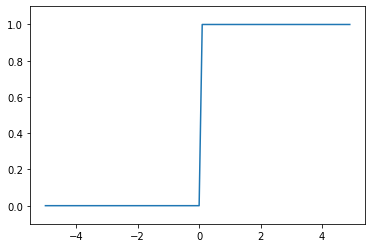

In [24]:
# 계단 함수 그리기
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange( -5.0, 5.0, 0.1)  # -0.5에서 5.0전까지 0.1 간격의 넘파이 배열 생성
y = step_function(x) # 인수로 받은 넘파이 배열 원소 각각 인수로 계단 함수 실행

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축 범위 지정
plt.show()   

In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])  # 인수 x가 넘파이 배열이어도 올바른 결과 나옴
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [26]:
# 브로드캐스트 : 넘파이 배열, 스칼라값 연산 → 넘파이 배열 각각의 원소와 스칼라값의 연산으로 바꿔 수행

t = np.array([1.0, 2.0, 3.0])
1.0 + t

1.0 / t

# → 스칼라 값과 넘파이 배열의 각 원소 사이에서 연산이 이뤄진 후, 넘파이 배열로 결과 출력됨

array([1.        , 0.5       , 0.33333333])

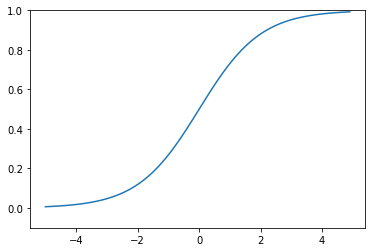

In [27]:
# 시그모이드 함수 구현하기
x = np.arange(-5.0, 5.0, 0.1) 
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1,1)  # y축 범위 지정
plt.show()

### 시그모이드 함수 VS 계단 함수
##### 1. 시그모이드 함수 
: 부드러운 곡선, 입력에 따라 출력이 연속적 변화   →  매끈함이 신경망 학습에서 아주 중요

##### 2. 계단 함수 
: 0을 경계로 출력이 갑자기 바뀜 


##### 
► 퍼셉트론은 뉴런 사이에 0 혹은 1 / 신경망은 연속적인 실수가 흐름

#####
► 공통점 : 입력이 아무리 작거나 커도 출력은 0에서 1사이

### 다차원 배열 계산

In [33]:
# 1차원 배열 수
import numpy as np

A = np.array([1, 2, 3, 4])

print(A)

np.ndim(A) # 배열의 차원 수 

A.shape

A.shape[0] # 다차원 배열일 때와 통일된 형태로 결과 반환하기 위함


[1 2 3 4]


4

In [36]:
# 2차원 배열 수 (행렬)

B = np.array([[1, 2], [3, 4], [5, 6]])

print(B) 

np.ndim(B)

B.shape

[[1 2]
 [3 4]
 [5 6]]


(3, 2)

In [40]:
# 행렬의 곱

A = np.array([[1,2], [3,4]])
A.shape

B = np.array([[5,6],[7,8]])
B.shape

np.dot(A, B)  # 넘파이 함수 

# 1차원 배열 - 벡터 , 2차원 배열 - 행렬 곱 
# 순서에 따라 값 달라진다. 

array([[19, 22],
       [43, 50]])

In [43]:
# A의 첫번째 차원 원소 수(열 수)와 B의 0번째 차원 원소 수(행 수) 같아야 함

A = np.array([[1,2,3],[4,5,6]])
A.shape

B = np.array([[1,2],[3,4],[5,6]])
B.shape

np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [46]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

B =np.array([7,8])
B.shape

np.dot(A, B)

array([23, 53, 83])

In [51]:
# 넘파이 행렬로 신경망 구현
x = np.array([1,2])
x.shape

w = np.array([[1,3,5],[2,4,6]])
print(w)

w.shape

y = np.dot(x,w)
print(y)

# 다차원 배열의 스칼라곱 구해주는 np.dot 사용 → 결과 y 계산 가능
# y의 원소 개수에 상관없이 한 번의 연산으로 계산 가능 
# 행렬의 곱으로 한꺼번에 계산해주는 기능 신경망 구현에 매우 중요

[[1 3 5]
 [2 4 6]]
[ 5 11 17]
